# Problem 8: Diabetes Treatment Analysis

A small medical clinic has asked you to provide an analysis of the efficacy of various drugs used to treat their patients with Type 1 and Type 2 Diabetes. They are providing a set of files with basic patient data, lab results, and their treatments.

### Diabetes Background information

Diabetes is a lifelong disease. Approximately 18.2 million Americans have the disease and almost one third (about 5.2 million) are unaware that they have it. An additional 41 million people have pre-diabetes. As yet, there is no cure. People with diabetes need to manage their disease to stay healthy.

Types of Diabetes - 

1. **Type 1** - The body attacks its own pancreas with antibodies, leading to this autoimmune condition.
2. **Type 2** - The amount of insuline produced by the pancreas is either not enough for the body's needs or the body's cells are resistant to it. 

Types of Diabetes Test - 

1. **Glucose Levels** - Your blood sugar (also called blood glucose) levels may be high if your pancreas is producing little or no insulin (type 1 diabetes), or if the body is not responding normally to insulin (type 2 diabetes).
2. **Hemoglobin A1C** - An A1C test is a blood test that estimates average glucose levels in your blood over the previous three months.
3. **Creatinine Test** - A creatinine test reveals important information about your kidneys.


Types of treatments for Diabetes - 

1. **Insulin** - Insulin in the form of injections, tablets, or continuous pumping
2. **Metformin** - Drugs that decrease sugar production by the liver and improve insulin resistance
3. **Glipizides** - Drugs that increases insulin production by the pancreas

In [1]:
import os
import pandas as pd
import numpy as np

from IPython.display import display

DATA_PATH = "./resource/asnlib/publicdata/diabetes/"

# Input first dataset
with open(DATA_PATH + "lab_results.csv") as fp:
    lab_results = set(fp.read().splitlines())

# Input second dataset
with open(DATA_PATH + "treatments.csv") as fp:
    treatments = set(fp.read().splitlines())

assert len(treatments)==117 ,  "The treatments file is corrupted!"
assert len(lab_results)==477, "The lab_results file is corrupted!"

# Loading the files into a pandas dataframe for you

df_treatments = pd.read_csv(DATA_PATH + "treatments.csv")
df_labresults = pd.read_csv(DATA_PATH + "lab_results.csv")

print("========= Treatments ========")
print(df_treatments.head())
print('\n')
print("========= Lab Results ========")
print(df_labresults.head())

========= Treatments ========
   Patient ID Gender  Age   Type of Diabetes Metformin? Glipizide? Insulin?
0       10109      F   39    Type 2 Mellitus        YES         NO       NO
1       10143      M   44  Diabetes Mellitus         NO         NO       NO
2       10170      F   45    Type 2 Mellitus         NO         NO       NO
3       10182      M   53    Type 2 Mellitus        YES         NO       NO
4       10194      F   93  Diabetes Mellitus        YES        YES       NO


========= Lab Results ========
   Patient ID        Test Result- Date taken
0       10109       HBA1C     8.9 (7/5/2017)
1       10109     Glucose     246 (7/5/2017)
2       10109  Creatinine     1.0 (7/5/2017)
3       10143       HBA1C    5.4 (5/18/2017)
4       10143       HBA1C    5.4 (5/18/2017)


**Exercise 0** (ungraded). Run the code cell below. It cleans up the `df_treatments` and `df_labresults` data frames a little bit. It's worth reading to see what it implements.

In [2]:
# Standardizing the column headers 
def standard_col(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('?','').str.replace('-','') 
    return df

df_labresults = standard_col(df_labresults)
df_treatments = standard_col(df_treatments)

#Checking for NAs
assert df_labresults.isnull().any().any() == False , "NAs there. Please check"
assert df_labresults.isnull().any().any() == False, "NAs there. Please check"

print("========= Treatments ========")
display(df_treatments.head())
print("\n========= Lab Results ========")
display(df_labresults.head())

========= Treatments ========


,patient_id,gender,age,type_of_diabetes,metformin,glipizide,insulin
0,10109,F,39,Type 2 Mellitus,YES,NO,NO
1,10143,M,44,Diabetes Mellitus,NO,NO,NO
2,10170,F,45,Type 2 Mellitus,NO,NO,NO
3,10182,M,53,Type 2 Mellitus,YES,NO,NO
4,10194,F,93,Diabetes Mellitus,YES,YES,NO



========= Lab Results ========


,patient_id,test,result_date_taken
0,10109,HBA1C,8.9 (7/5/2017)
1,10109,Glucose,246 (7/5/2017)
2,10109,Creatinine,1.0 (7/5/2017)
3,10143,HBA1C,5.4 (5/18/2017)
4,10143,HBA1C,5.4 (5/18/2017)


**Exercise 1** (2 points): separate lab result values from date(s) taken in the `df_labresults` data frame.

As you may have observed, the column `result_date_taken` has two important values in the same field: 
1. A lab result value (a floating-point number).
2. The date taken (month/day/year).

In this exercise, you have to separate these values. Create a new dataframe named `df_labresults_sep`, which should have four columns: `patient_id`, `test`, `test_value`, and `date_taken`.

**Important implementation note:** The new `test_value` field should be in `np.float64` format, and the new `date_taken` field should be in np.datetime64 format. For example, a `result_date_taken` field with the value `8.9 (7/5/2017)` should be split into a `test_value` field with `8.9` and a `date_taken` field with `7/5/2017`.

> _Hint_ : Remember how you implemented this in Notebook 7? (There are various ways to do it, and we are not testing you on a specific way.)

In [3]:
def ex1__1(df):  # Method 1
    get_result_value = lambda s: float(s.split()[0])
    get_date_string = lambda s: s.split()[1][1:-1]
    df_sep = df[['patient_id', 'test']].copy()
    df_sep['test_value'] = df['result_date_taken'].apply(get_result_value)
    df_sep['date_taken'] = pd.to_datetime(df['result_date_taken'].apply(get_date_string))
    return df_sep

df_labresults_sep = ex1__1(df_labresults)
df_labresults_sep.head()

,patient_id,test,test_value,date_taken
0,10109,HBA1C,8.9,2017-07-05
1,10109,Glucose,246.0,2017-07-05
2,10109,Creatinine,1.0,2017-07-05
3,10143,HBA1C,5.4,2017-05-18
4,10143,HBA1C,5.4,2017-05-18


In [4]:
# Test cell: `exercise-1` (2 points)

def canonicalize_tibble(X):
    var_names = sorted(X.columns)
    Y = X[var_names].copy()
    Y.sort_values(by=var_names, inplace=True)
    Y.reset_index(drop=True, inplace=True)
    return Y

def tibbles_are_equivalent(A, B):
    A_hat = canonicalize_tibble(A)
    B_hat = canonicalize_tibble(B)
    equal = (A_hat == B_hat)
    return equal.all().all()

# Input E1 dataset
with open(DATA_PATH + "lab_results_e1.csv") as fp:
    lab_results_e1 = set(fp.read().splitlines())

assert len(lab_results_e1)==477, "The lab_results_e1 file is corrupted!"

# Loading the files into a pandas dataframe for you
df_labresults_e1 = pd.read_csv(DATA_PATH + "lab_results_e1.csv")
df_labresults_e1['date_taken'] = pd.to_datetime(df_labresults_e1['date_taken'])

# Compare df_labresults_e1 with df_labresults
print("=== Last few rows of your solution ===")
print(df_labresults_sep.tail())

print ("=== Last few rows of the instructor's solution ===")
print(df_labresults_e1.tail())

# Check it
assert tibbles_are_equivalent(canonicalize_tibble(df_labresults_sep), canonicalize_tibble(df_labresults_e1)), "Please check your solution"
print ("\n(Passed.)")

=== Last few rows of your solution ===
     patient_id        test  test_value date_taken
475       11964       HBA1C        8.60 2017-06-14
476       11964     Glucose      231.00 2017-05-01
477       11964     Glucose      194.00 2017-08-02
478       11964  Creatinine        1.10 2017-05-01
479       11964  Creatinine        1.28 2017-06-14
=== Last few rows of the instructor's solution ===
     patient_id        test  test_value date_taken
475       11964       HBA1C        8.60 2017-06-14
476       11964     Glucose      231.00 2017-05-01
477       11964     Glucose      194.00 2017-08-02
478       11964  Creatinine        1.10 2017-05-01
479       11964  Creatinine        1.28 2017-06-14

(Passed.)


**Exercise 2** (1 point). Create a function to remove duplicate rows from a data frame.

The definition of "duplicate rows" in a data frame can vary by situation. In this exercise, consider a set of rows to be duplicated if they have the same "primary id." **A primary id is defined to be the concatenated values of one or more columns.** For example, consider the data frame,

| A | B | C | D |
|:-:|:-:|:-:|:-:|
| 0 | 8 | 4 | 1 |
| 0 | 3 | 4 | 2 |
| 0 | 8 | 1 | 1 |

Suppose you are told the primary id is defined by columns `'A'` and `'C'`. Then the first two rows are duplicates since they both have the values of 0 and 4 in columns `'A'` and `'C'`, respectively. You want to remove such rows.

In this exercise, let's take the primary ids for our two data frames to be the following:

1. For `df_labresults_sep`, the primary id is the combination of `patient_id` + `test` + `date_taken`.
2. For `df_treatments`, the primary id is just `patient_id`.

**Note**: For `df_treatments`, we will want to assume that a patient will take a particular test only once on a certain date, hence the need to remove duplicate rows. Otherwise, we would need a different primary id. In general, it is a very important step to understand what might be appropriate primary ids for your datasets before you start working on it!

Your function, `remove_duplicates`, should accept two inputs:
1. `df` - The data frame to analyze
2. `primary_cols` - A list of column names that define the primary id

The function `remove_duplicates` should return the new data frame without any duplicate rows.

In [5]:
def remove_duplicates(df, primary_cols):
    assert type(primary_cols) is list
    df.sort_values(primary_cols, ascending=True)
    df.drop_duplicates(subset=primary_cols, inplace=True)
    return(df)


In [6]:
# Test cell: `exercise-2` (1 points)

print("===== Number of rows before applying your function on df_labresults_sep =====")
print(len(df_labresults_sep))

with open(DATA_PATH + "lab_results_e2_v2.csv") as fp:
    lab_results_e2 = set(fp.read().splitlines())

# Loading the files into a pandas dataframe for you
df_labresults_e2 = pd.read_csv(DATA_PATH + "lab_results_e2_v2.csv")

df_labresults_e2['date_taken'] = pd.to_datetime(df_labresults_e2['date_taken'])
#df_labresults_sep['date_taken'] = pd.to_datetime(df_labresults_sep['date_taken']) 

df_labresults_v2 = remove_duplicates(df_labresults_sep,['patient_id','test','date_taken'])

print("===== Number of rows in new dataset of df_labresults_sep returned by your function =====")
print(len(df_labresults_v2))

print("====== Number of rows in new dataset of df_labresults_sep returned by the Instructor's solution =========")
print(len(df_labresults_e2))

assert len(df_labresults_e2) == len(df_labresults_v2), "Duplicates incorrectly removed from df_labresults_sep!"
      
assert tibbles_are_equivalent(canonicalize_tibble(df_labresults_v2), canonicalize_tibble(df_labresults_e2)) , "Please check your solution!"

print()

print("===== Number of rows in old dataset of df_treatments returned by your function =====")
print(len(df_treatments))
remove_duplicates(df_treatments, ['patient_id'])

assert len(df_treatments)==116, "Duplicates incorrectly removed from df_treatments!"
#df_labresults = df_labresults_v2
print ("\n(Passed.)")

===== Number of rows before applying your function on df_labresults_sep =====
480
===== Number of rows in new dataset of df_labresults_sep returned by your function =====
475
====== Number of rows in new dataset of df_labresults_sep returned by the Instructor's solution =========
475

===== Number of rows in old dataset of df_treatments returned by your function =====
116

(Passed.)


**Exercise 3** (3 points). Convert `df_labresults` from "long" to "wide" and calculate a percent change.

To help better understand which treatments are (or are not) working, we will convert the `df_labresults` from its long format to a customized wide format according to the following logic.

The new "wide" data frame, named `df_labresults_wide`, should have these columns:

* `patient_id`,
* `hba1c_earliest`,
* `hba1c_latest`,
* `hba1c_change`,
* `glucose_earliest`,
* `glucose_latest`,
* `glucose_change`,
* `creatinine_earliest`,
* `creatinine_latest`,
* `creatinine_change`.

The `.*_earliest` columns should include that lab result with the earliest date.

The `.*_latest` columns should include that lab result with the latest date.

The `.*_change` columns should hold the relative change, (Latest - Earliest) / Earliest.

If an `Earliest` value is missing, set it to the `Latest` value. If a `Latest` value is missing, set it to the `Earliest` value. If both are missing, set both to zero.

#### Detailed Example:
From Notebook 7, we need a casting operation. Each observation is split across multiple rows. To tidy it up, we want to merge rows. Here's a detailed example: Suppose the original dataset had the following records for a patient:
```
patient_id	test	    test_value	date_taken
	11964	HBA1C	     8.60	    2017-06-14
    11964	Glucose     231.00	    2017-05-01
    11964	Glucose     202.00	    2017-07-01
    11964	Glucose     194.00	    2017-09-02
	11964	Creatinine	1.10	    2017-05-01
	11964	Creatinine	1.28	    2017-08-14
```
Using the specification above, these observations would be cast into one record containing the following:
```
patient_id  hba1c_earliest hba1c_latest hba1c_change glucose_earliest glucose_latest
    11964      8.60           8.60          0.0000        231.0           194.0   
glucose_change creatinine_earliest creatinine_latest creatinine_change
     -0.1602         1.10               1.28             0.1636
```

Here are some important implementation notes:
> **Note 1**: For your reference and use, we have copied the `cast` function from Notebook 7 for you.
>
> **Note 2**: If you observed, you are not required to create a function for this. We expect a new dataframe `df_labresults_wide` that has the required format according to the exercise. 
>
> **Note 3**: Change values are rounded to 4 digits (use `round(x, 4)` for the same).

In [7]:
# Cast from Notebook 7

def cast(df, key, value, join_how='outer'):
    """Casts the input data frame into a tibble,
    given the key column and value column.
    """
    assert type(df) is pd.DataFrame
    assert key in df.columns and value in df.columns
    assert join_how in ['outer', 'inner']
    
    fixed_vars = df.columns.difference([key, value])
    tibble = pd.DataFrame(columns=fixed_vars) # empty frame
    
    new_vars = df[key].unique()
    for v in new_vars:
        df_v = df[df[key] == v]
        del df_v[key]
        df_v = df_v.rename(columns={value: v})
        tibble = tibble.merge(df_v,
                              on=list(fixed_vars),
                              how=join_how)
    return tibble

In [8]:
df_earliest = df_labresults_sep.copy()
df_earliest = df_earliest.sort_values(['patient_id', 'test', 'date_taken'], ascending=True)
df_earliest = df_earliest.drop('date_taken', 1)
df_earliest.drop_duplicates(subset=['patient_id', 'test'], keep='first', inplace=True)
df_labresults_earliest = cast(df_earliest, 'test', 'test_value', 'outer')
df_labresults_earliest.columns = ['patient_id', 'creatinine_earliest','glucose_earliest','hba1c_earliest'] 

df_latest = df_labresults_sep.copy()
df_latest = df_latest.sort_values(['patient_id', 'test', 'date_taken'], ascending=True)
df_latest = df_latest.drop('date_taken', 1)
df_latest.drop_duplicates(subset=['patient_id', 'test'], keep='last', inplace=True)
df_labresults_latest = cast(df_latest, 'test', 'test_value', 'outer')
df_labresults_latest.columns = ['patient_id', 'creatinine_latest','glucose_latest', 'hba1c_latest'] 

df_labresults_wide = pd.merge(df_labresults_earliest,df_labresults_latest, on='patient_id', how='outer')

df_labresults_wide['hba1c_change']  = round((df_labresults_wide['hba1c_latest'] - df_labresults_wide['hba1c_earliest']) / df_labresults_wide['hba1c_earliest'],4)
df_labresults_wide['glucose_change']  = round((df_labresults_wide['glucose_latest'] - df_labresults_wide['glucose_earliest']) / df_labresults_wide['glucose_earliest'],4)
df_labresults_wide['creatinine_change']  = round((df_labresults_wide['creatinine_latest'] - df_labresults_wide['creatinine_earliest']) / df_labresults_wide['creatinine_earliest'],4)

df_labresults_wide.fillna(0, inplace=True)


In [9]:
# Test cell: `exercise-3` (3 points)

# Compare df_labresults_e3 with df_labresults
# .........................................
# Input E3 dataset
try:
    print(df_labresults_wide.columns)
except NameError:
    print("Check whether the name of the new dataframe is - df_labresults_wide")
    
with open(DATA_PATH + "lab_results_wide_e3_v2.csv") as fp:
    lab_results_wide_e3 = set(fp.read().splitlines())

assert len(lab_results_wide_e3)==117, "The lab_results_wide_e3 file is corrupted!"
 
# Loading the files into a pandas dataframe for you
df_labresults_wide_e3 = pd.read_csv(DATA_PATH + "lab_results_wide_e3_v2.csv")
df_labresults_wide_e3['hba1c_change'] = round(df_labresults_wide_e3['hba1c_change'],4)
df_labresults_wide_e3['glucose_change'] = round(df_labresults_wide_e3['glucose_change'],4)
df_labresults_wide_e3['creatinine_change'] = round(df_labresults_wide_e3['creatinine_change'],4)
#df_labresults_wide_e3.fillna(0, inplace=True)
print()

# Compare df_labresults_e1 with df_labresults
print("=== First few rows of your solution ===")
display(df_labresults_wide.head())

print ("=== First few rows of the instructor's solution ===")
display(df_labresults_wide_e3.head())

# Check it
assert tibbles_are_equivalent(canonicalize_tibble(df_labresults_wide), canonicalize_tibble(df_labresults_wide_e3))
print ("\n(Passed.)")

Index(['patient_id', 'creatinine_earliest', 'glucose_earliest',
       'hba1c_earliest', 'creatinine_latest', 'glucose_latest', 'hba1c_latest',
       'hba1c_change', 'glucose_change', 'creatinine_change'],
      dtype='object')

=== First few rows of your solution ===


,patient_id,creatinine_earliest,glucose_earliest,hba1c_earliest,creatinine_latest,glucose_latest,hba1c_latest,hba1c_change,glucose_change,creatinine_change
0,10109,1.0,246.0,8.9,1.00,246.0,8.9,0.0000,0.0000,0.0000
1,10143,1.7,103.0,5.4,1.40,107.0,5.4,0.0000,0.0388,-0.1765
2,10170,1.0,88.0,6.0,1.00,115.0,6.0,0.0000,0.3068,0.0000
3,10182,1.1,98.0,6.4,1.02,109.0,6.4,0.0000,0.1122,-0.0727
4,10194,1.0,274.0,7.2,1.00,211.0,7.4,0.0278,-0.2299,0.0000


=== First few rows of the instructor's solution ===


,patient_id,creatinine_earliest,glucose_earliest,hba1c_earliest,creatinine_latest,glucose_latest,hba1c_latest,hba1c_change,glucose_change,creatinine_change
0,10109,1.0,246.0,8.9,1.00,246.0,8.9,0.0000,0.0000,0.0000
1,10143,1.7,103.0,5.4,1.40,107.0,5.4,0.0000,0.0388,-0.1765
2,10170,1.0,88.0,6.0,1.00,115.0,6.0,0.0000,0.3068,0.0000
3,10182,1.1,98.0,6.4,1.02,109.0,6.4,0.0000,0.1122,-0.0727
4,10194,1.0,274.0,7.2,1.00,211.0,7.4,0.0278,-0.2299,0.0000



(Passed.)


In [10]:
df_labresults_wide[df_labresults_wide['patient_id']==10830]

,patient_id,creatinine_earliest,glucose_earliest,hba1c_earliest,creatinine_latest,glucose_latest,hba1c_latest,hba1c_change,glucose_change,creatinine_change
31,10830,1.2,100.0,8.8,0.9,155.0,6.8,-0.2273,0.55,-0.25


**Exercise 4** (2 points). Create a new field to hold the treatment type in `df_treatments`.

The new `treatment_type` field should be based on the values in columns (metformin, glipizide, insulin): 

("value of `treatment_type`": (value of `metformin`,value of `glipizide`, value of `insulin`))

1. "No Treatment" (NO, NO, NO)
2. "Metformin" (YES, NO, NO)
3. "Glipizide" (NO, YES, NO)
4. "Insulin" (NO, NO, YES)
5. "Metformin-Glipizide" (YES, YES, NO)
6. "Metformin-Insulin" (YES, NO, YES)
7. "Glipizide-Insulin" (NO, YES, YES)
8. "Metformin-Glipizide-Insulin" (YES, YES, YES)

For this exercise, we are not providing any starting template. You have to change the already existing `df_treatments` such that it has an additional column of `treatment_type`. Also make sure that the new values exactly match the values given above.

In [11]:
def label_treatment (row):
    treatments=[]
    if row['metformin'] == 'YES' :
        treatments.append('Metformin')
    if row['glipizide'] == 'YES' :
        treatments.append('Glipizide')
    if row['insulin'] == 'YES' :
        treatments.append('Insulin')
    if len(treatments) == 0:
        return 'No Treatment'
    return '-'.join(treatments)

df_treatments['treatment_type'] = df_treatments.apply (lambda row: label_treatment (row),axis=1)


In [12]:
# Test cell: `exercise-4` (2 points)

# Compare df_treatments_e4 with df_treatments
# .........................................
# Input E4 dataset
with open(DATA_PATH + "treatments_e4.csv") as fp:
    treatments_e4 = set(fp.read().splitlines())

assert len(treatments_e4)==117, "The treatments_e4 file is corrupted!"

# Loading the files into a pandas dataframe for you
df_treatments_e4 = pd.read_csv(DATA_PATH + "treatments_e4.csv")

# Compare df_labresults_e1 with df_labresults
print("=== First few rows of your solution ===")
display(df_treatments.head())

print ("=== First few rows of the instructor's solution ===")
display(df_treatments_e4.head())

# Check it
assert tibbles_are_equivalent(canonicalize_tibble(df_treatments), canonicalize_tibble(df_treatments_e4))
print ("\n(Passed.)")

=== First few rows of your solution ===


,patient_id,gender,age,type_of_diabetes,metformin,glipizide,insulin,treatment_type
0,10109,F,39,Type 2 Mellitus,YES,NO,NO,Metformin
1,10143,M,44,Diabetes Mellitus,NO,NO,NO,No Treatment
2,10170,F,45,Type 2 Mellitus,NO,NO,NO,No Treatment
3,10182,M,53,Type 2 Mellitus,YES,NO,NO,Metformin
4,10194,F,93,Diabetes Mellitus,YES,YES,NO,Metformin-Glipizide


=== First few rows of the instructor's solution ===


,patient_id,gender,age,type_of_diabetes,metformin,glipizide,insulin,treatment_type
0,10109,F,39,Type 2 Mellitus,YES,NO,NO,Metformin
1,10143,M,44,Diabetes Mellitus,NO,NO,NO,No Treatment
2,10170,F,45,Type 2 Mellitus,NO,NO,NO,No Treatment
3,10182,M,53,Type 2 Mellitus,YES,NO,NO,Metformin
4,10194,F,93,Diabetes Mellitus,YES,YES,NO,Metformin-Glipizide



(Passed.)


**Exercise 5** (2 points). Combine both the `df_treatments` and `df_labresults_wide` data frames and aggregate the data.

This would be the final step of our analysis, where we merge the two dataframes and aggregate the data to get a holistic view of the outcomes.

You need to do two things in this exercise:
1. Merge `df_treatments` and `df_labresults_wide` on the key, `patient_id`
2. Aggregate the `_change` columns by grouping them by `treatment_type`. The metric to use for aggregation is the mean (average)!
 
To make the objective simpler to understand, what we need is a summarised table explaning the mean change for all three types of tests (ie. HBA1C, Glucose and Creatinine) for each type of treatment_type. It should look something like this:


![q5_img.jpeg](resource/asnlib/publicdata/diabetes/q5_img.jpeg)

(The values shown above are random and used for illustration only.)

Store your results in a data frame named `df_summary` having four columns: `treatment_type`, `hba1c`, `glucose`, and `creatinine`. The values are the mean values rounded to 4 digits (use `round(x, 4)` for the same). **Also, don't forget to ignore any row that has a `_change` value of zero!**

Hint: Read more about `groupby()` function in the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). Another useful resource: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/.

In [18]:
df_analysis = df_treatments.merge(df_labresults_wide, on = ['patient_id'])

df_hb = round(df_analysis[df_analysis['hba1c_change']!=0].groupby('treatment_type')['hba1c_change'].mean(), 4)
df_gl = round(df_analysis[df_analysis['glucose_change']!=0].groupby('treatment_type')['glucose_change'].mean(), 4)
df_cr = round(df_analysis[df_analysis['creatinine_change']!=0].groupby('treatment_type')['creatinine_change'].mean(), 4)

display(df_analysis.head())

df_hb = pd.DataFrame({'treatment_type':df_hb.index, 'hba1c':df_hb.values})
df_gl = pd.DataFrame({'treatment_type':df_gl.index, 'glucose':df_gl.values})
df_cr = pd.DataFrame({'treatment_type':df_cr.index, 'creatinine':df_cr.values})

df_summary = df_hb.merge(df_gl).merge(df_cr)

display(df_summary)


,patient_id,gender,age,type_of_diabetes,metformin,glipizide,insulin,treatment_type,creatinine_earliest,glucose_earliest,hba1c_earliest,creatinine_latest,glucose_latest,hba1c_latest,hba1c_change,glucose_change,creatinine_change
0,10109,F,39,Type 2 Mellitus,YES,NO,NO,Metformin,1.0,246.0,8.9,1.00,246.0,8.9,0.0000,0.0000,0.0000
1,10143,M,44,Diabetes Mellitus,NO,NO,NO,No Treatment,1.7,103.0,5.4,1.40,107.0,5.4,0.0000,0.0388,-0.1765
2,10170,F,45,Type 2 Mellitus,NO,NO,NO,No Treatment,1.0,88.0,6.0,1.00,115.0,6.0,0.0000,0.3068,0.0000
3,10182,M,53,Type 2 Mellitus,YES,NO,NO,Metformin,1.1,98.0,6.4,1.02,109.0,6.4,0.0000,0.1122,-0.0727
4,10194,F,93,Diabetes Mellitus,YES,YES,NO,Metformin-Glipizide,1.0,274.0,7.2,1.00,211.0,7.4,0.0278,-0.2299,0.0000


,treatment_type,hba1c,glucose,creatinine
0,Glipizide,-0.2273,-0.0484,-0.2500
1,Glipizide-Insulin,-0.0982,0.2528,0.1066
2,Insulin,0.0580,0.4097,0.1173
3,Metformin,1.1241,0.0809,0.0331
4,Metformin-Glipizide,-0.0508,-0.1580,-0.0112
5,Metformin-Glipizide-Insulin,-0.0514,0.1578,0.0669
6,Metformin-Insulin,-0.1369,-0.0394,0.0822
7,No Treatment,-0.0164,-0.0733,0.0076


In [19]:
# Test cell: `exercise-5` (2 points)

# Compare df_summary_e5 with df_summary
# .........................................
# Input E5 dataset
with open(DATA_PATH + "summary_e5.csv") as fp:
    summary_e5 = set(fp.read().splitlines())

assert len(summary_e5)==9, "The summary_e5 file is corrupted!"

# Loading the files into a pandas dataframe for you
df_summary_e5 = pd.read_csv(DATA_PATH + "summary_e5.csv")

# Compare df_labresults_e1 with df_labresults
print("=== Your solution ===")
display(df_summary)

print ("=== Instructor's solution ===")
display(df_summary_e5)

df_summary_e5['hba1c'] = round(df_summary_e5['hba1c'],4)
df_summary_e5['glucose'] = round(df_summary_e5['glucose'],4)
df_summary_e5['creatinine'] = round(df_summary_e5['creatinine'],4)

# Check it
assert tibbles_are_equivalent(canonicalize_tibble(df_summary), canonicalize_tibble(df_summary_e5))
print ("\n(Passed.)")

=== Your solution ===


,treatment_type,hba1c,glucose,creatinine
0,Glipizide,-0.2273,-0.0484,-0.2500
1,Glipizide-Insulin,-0.0982,0.2528,0.1066
2,Insulin,0.0580,0.4097,0.1173
3,Metformin,1.1241,0.0809,0.0331
4,Metformin-Glipizide,-0.0508,-0.1580,-0.0112
5,Metformin-Glipizide-Insulin,-0.0514,0.1578,0.0669
6,Metformin-Insulin,-0.1369,-0.0394,0.0822
7,No Treatment,-0.0164,-0.0733,0.0076


=== Instructor's solution ===


,treatment_type,hba1c,glucose,creatinine
0,Glipizide,-0.2273,-0.0484,-0.2500
1,Glipizide-Insulin,-0.0982,0.2528,0.1066
2,Insulin,0.0580,0.4097,0.1173
3,Metformin,1.1241,0.0809,0.0331
4,Metformin-Glipizide,-0.0508,-0.1580,-0.0112
5,Metformin-Glipizide-Insulin,-0.0514,0.1578,0.0669
6,Metformin-Insulin,-0.1369,-0.0394,0.0822
7,No Treatment,-0.0164,-0.0733,0.0076



(Passed.)


**Exercise 6** (ungraded). Create a plot showing lab result change by treatment type.

And now, let's see the results of using your data science skills to extract insights for the clinic! 

The medical clinic is interested in the average percent change of each available lab test result by treatment type.

Run the cell below to create a bar chart showing the results.

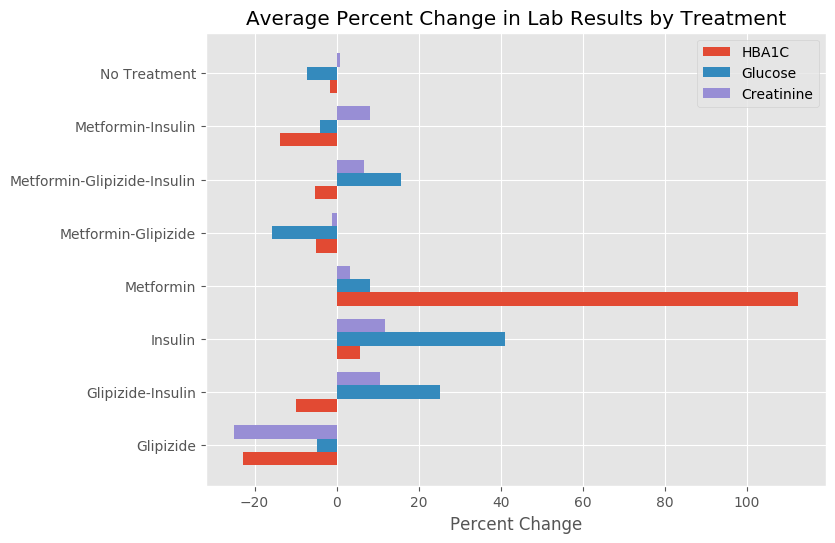

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

plt.style.use('ggplot')
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

N = len(df_summary)
HBA1C = df_summary['hba1c']*100
Glucose = df_summary['glucose']*100
Creatinine = df_summary['creatinine']*100

ind = np.arange(N) 
width = 0.25       
plt.barh(ind, HBA1C, width, label='HBA1C')
plt.barh(ind + width, Glucose, width, label='Glucose')
plt.barh(ind + width*2, Creatinine, width, label='Creatinine')

plt.xlabel('Percent Change')
plt.title('Average Percent Change in Lab Results by Treatment')

plt.yticks(ind+width, tuple(df_summary['treatment_type']))
#plt.yticks(ind + width*2, tuple(df_summary.columns.values))
plt.legend(loc='best')
plt.show()

**Fin!** You've reached the end of this problem. Don't forget to restart the kernel and run the entire notebook from top-to-bottom to make sure you did everything correctly. If that is working, try submitting this problem. (Recall that you _must_ submit and pass the autograder to get credit for your work!)